# <center><font color = '#DF9166' size = 20 center> **Data Preprocessing**</font></center>



## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)

## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
sns.set_style("whitegrid")
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [4]:
sys.path.append(os.path.abspath(os.path.pardir))
from scripts.preprocess_data import *

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [5]:
CREDIT_DATA_PATH = "../data/raw/creditcard.csv"
FRAUD_DATA_PATH = "../data/raw/Fraud_Data.csv"
IP_DATA_PATH = "../data/raw/IpAddress_to_Country.csv"

In [6]:
credit_df = pd.read_csv(CREDIT_DATA_PATH)
credit_df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [7]:
fraud_df = pd.read_csv(FRAUD_DATA_PATH)
fraud_df.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0


In [8]:
ip_df = pd.read_csv(IP_DATA_PATH)
ip_df.head(2)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China


## <font color = '#DF9166' size=6>**Data Inspection**<font/><a class = 'anchor' id = 'data_inspection'/>

In [9]:
print(f"    Shape of the Credit Dataset: {credit_df.shape}")
print(f"     Shape of the Fraud Dataset: {fraud_df.shape}")
print(f"Shape of the IP Address Dataset: {ip_df.shape}")

    Shape of the Credit Dataset: (284807, 31)
     Shape of the Fraud Dataset: (151112, 11)
Shape of the IP Address Dataset: (138846, 3)


### Inspect Data General Info

In [10]:
print("Dataset Credit Info:\n")
credit_df.info()

Dataset Credit Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

In [11]:
print("Dataset Fraud Info:\n")
fraud_df.info()

Dataset Fraud Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [12]:
print("Dataset IP Address Info:\n")
ip_df.info()

Dataset IP Address Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Inspect Data Uniqueness

In [13]:
print("Number of Unique Values in Each Column of Credit Dataset:\n")
print("_" * 70, f"{'Column Name':>45} |  Unique Values", "_" * 70, sep="\n")
for col in credit_df.columns:
    print(f"{col:>45} | {credit_df[col].nunique()}")
print("_" * 70)

Number of Unique Values in Each Column of Credit Dataset:

______________________________________________________________________
                                  Column Name |  Unique Values
______________________________________________________________________
                                         Time | 124592
                                           V1 | 275663
                                           V2 | 275663
                                           V3 | 275663
                                           V4 | 275663
                                           V5 | 275663
                                           V6 | 275663
                                           V7 | 275663
                                           V8 | 275663
                                           V9 | 275663
                                          V10 | 275663
                                          V11 | 275663
                                          V12 | 275663
                     

In [14]:
print("Number of Unique Values in Each Column of Fraud Dataset:\n")
print("_" * 70, f"{'Column Name':>45} |  Unique Values", "_" * 70, sep="\n")
for col in fraud_df.columns:
    print(f"{col:>45} | {fraud_df[col].nunique()}")
print("_" * 70)

Number of Unique Values in Each Column of Fraud Dataset:

______________________________________________________________________
                                  Column Name |  Unique Values
______________________________________________________________________
                                      user_id | 151112
                                  signup_time | 151112
                                purchase_time | 150679
                               purchase_value | 122
                                    device_id | 137956
                                       source | 3
                                      browser | 5
                                          sex | 2
                                          age | 58
                                   ip_address | 143512
                                        class | 2
______________________________________________________________________


In [15]:
print("Number of Unique Values in Each Column of IP Address Dataset:\n")
print("_" * 70, f"{'Column Name':>45} |  Unique Values", "_" * 70, sep="\n")
for col in ip_df.columns:
    print(f"{col:>45} | {ip_df[col].nunique()}")
print("_" * 70)

Number of Unique Values in Each Column of IP Address Dataset:

______________________________________________________________________
                                  Column Name |  Unique Values
______________________________________________________________________
                       lower_bound_ip_address | 138846
                       upper_bound_ip_address | 138846
                                      country | 235
______________________________________________________________________


### Inspect Data Missingness

In [16]:
print("Missing values and their proportions (%) in Credit DataFrame:")
missing_values_proportions(credit_df)

Missing values and their proportions (%) in Credit DataFrame:


,Missing Values,Proportion (%)


In [17]:
print("Missing values and their proportions (%) in Fraud DataFrame:")
missing_values_proportions(fraud_df)

Missing values and their proportions (%) in Fraud DataFrame:


,Missing Values,Proportion (%)


In [18]:
print("Missing values and their proportions (%) in IP Address DataFrame:")
missing_values_proportions(ip_df)

Missing values and their proportions (%) in IP Address DataFrame:


,Missing Values,Proportion (%)


There are no missing values in the dataframes.

### Inspect Data Duplication

In [19]:
duplicate_rows = credit_df[credit_df.duplicated()]
print(f"Number of duplicate rows in credit dataframe: {duplicate_rows.shape[0]}")

Number of duplicate rows in credit dataframe: 1081


In [20]:
duplicate_rows = fraud_df[fraud_df.duplicated()]
print(f"Number of duplicate rows in fraud dataframe: {duplicate_rows.shape[0]}")

Number of duplicate rows in fraud dataframe: 0


In [21]:
duplicate_rows = ip_df[ip_df.duplicated()]
print(f"Number of duplicate rows in IP address dataframe: {duplicate_rows.shape[0]}")

Number of duplicate rows in IP address dataframe: 0


## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>

### Handling Duplicates

In [22]:
credit_df = credit_df.drop_duplicates()
print(f"Number of duplicate rows in credit dataframe: {credit_df.duplicated().sum()}")

Number of duplicate rows in credit dataframe: 0


### Data Type Conversion

In [23]:
ip_df.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [24]:
fraud_df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [25]:
fraud_df["ip_address"] = fraud_df["ip_address"].astype(int)
fraud_df.dtypes

user_id            int64
signup_time       object
purchase_time     object
purchase_value     int64
device_id         object
source            object
browser           object
sex               object
age                int64
ip_address         int64
class              int64
dtype: object

In [26]:
credit_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Handling Outliers

#### Outlier Handling for `credit_df`

In [27]:
numerical_columns = [
    col
    for col in credit_df.select_dtypes(include=[np.number]).columns
    if col not in ["Class", "Amount"]
]

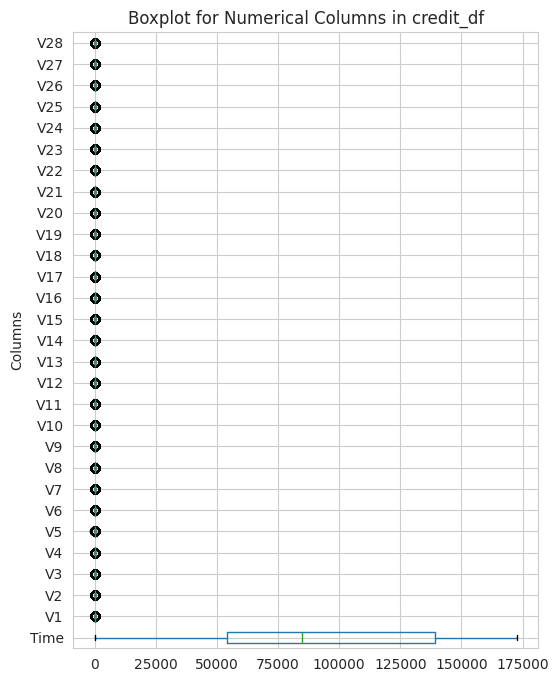

In [28]:
# Detect Outliers Using Boxplots for credit_df
plt.figure(figsize=(6, 8))
credit_df.boxplot(
    column=numerical_columns,
    vert=False,
)
plt.title("Boxplot for Numerical Columns in credit_df")
plt.ylabel("Columns")
plt.show()

In [29]:
# Replace outliers with boundaries for all numerical columns
credit_df = handle_outliers(
    credit_df, numerical_columns, plot_box=False, replace_with="mean"
)

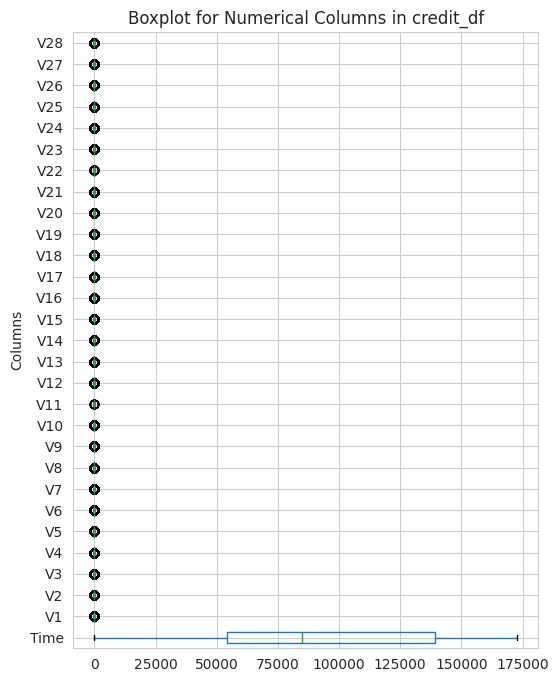

In [30]:
# Detect Outliers Using Boxplots for credit_df
plt.figure(figsize=(6, 8))
credit_df.boxplot(
    column=numerical_columns,
    vert=False,
)
plt.title("Boxplot for Numerical Columns in credit_df")
plt.ylabel("Columns")
plt.show()

In [31]:
# Check for remaining outliers using Z-Score
print("\nColumns with Potential Outliers After Z-Score Analysis:\n")
for col in numerical_columns:
    z_scores = zscore(credit_df[col])
    outliers = (np.abs(z_scores) > 3).sum()
    print(f"{col:>45}: {outliers} potential outliers")


Columns with Potential Outliers After Z-Score Analysis:

                                         Time: 0 potential outliers
                                           V1: 478 potential outliers
                                           V2: 12 potential outliers
                                           V3: 0 potential outliers
                                           V4: 0 potential outliers
                                           V5: 0 potential outliers
                                           V6: 805 potential outliers
                                           V7: 0 potential outliers
                                           V8: 0 potential outliers
                                           V9: 0 potential outliers
                                          V10: 0 potential outliers
                                          V11: 30 potential outliers
                                          V12: 0 potential outliers
                                          V13: 0 pot

#### Outlier Handling for `fraud_df`


In [32]:
numerical_columns = [
    col
    for col in fraud_df.select_dtypes(include=[np.number]).columns
    if col not in ["ip_address", "class"]
]

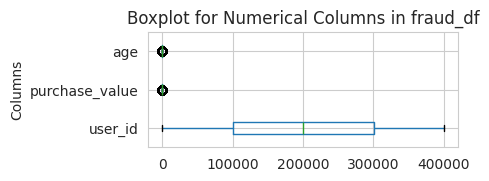

In [33]:
# Detect Outliers Using Boxplots for fraud_df
plt.figure(figsize=(4, 1.5))

fraud_df.boxplot(
    column=numerical_columns,
    vert=False,
)
plt.title("Boxplot for Numerical Columns in fraud_df")
plt.ylabel("Columns")
plt.show()

In [34]:
# Replace outliers with boundaries for all numerical columns
fraud_df = handle_outliers(
    fraud_df, numerical_columns, plot_box=False, replace_with="mean"
)

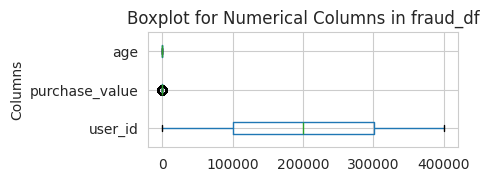

In [35]:
# Detect Outliers Using Boxplots for fraud_df
plt.figure(figsize=(4, 1.5))

fraud_df.boxplot(
    column=numerical_columns,
    vert=False,
)
plt.title("Boxplot for Numerical Columns in fraud_df")
plt.ylabel("Columns")
plt.show()

In [36]:
# Check for remaining outliers using Z-Score
print("\nColumns with Potential Outliers After Z-Score Analysis:\n")
for col in numerical_columns:
    z_scores = zscore(fraud_df[col])
    outliers = (np.abs(z_scores) > 3).sum()
    print(f"{col:>45}: {outliers} potential outliers")


Columns with Potential Outliers After Z-Score Analysis:

                                      user_id: 0 potential outliers
                               purchase_value: 0 potential outliers
                                          age: 0 potential outliers


### **IP Address to Country Mapping**  


This section assigns a country to each row in `fraud_df` by matching its `ip_address` to the corresponding range in `ip_df`. If an IP falls within a specified range, the country is assigned to the `fraud_df` dataframe.

In [37]:
for row in fraud_df.iterrows():
    ip_address = row[1]["ip_address"]
    country = ip_df[
        (ip_df["lower_bound_ip_address"] <= ip_address)
        & (ip_df["upper_bound_ip_address"] >= ip_address)
    ]["country"].values

    if len(country) > 0:
        fraud_df.loc[row[0], "country"] = country[0]

In [38]:
fraud_df.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058.0,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,732758368,0,Japan
1,333320.0,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,350311387,0,United States


In [39]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  float64
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  float64
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  float64
 9   ip_address      151112 non-null  int64  
 10  class           151112 non-null  int64  
 11  country         129146 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 13.8+ MB


In [40]:
fraud_df = fraud_df.dropna()
print(fraud_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 0 to 151110
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         129146 non-null  float64
 1   signup_time     129146 non-null  object 
 2   purchase_time   129146 non-null  object 
 3   purchase_value  129146 non-null  float64
 4   device_id       129146 non-null  object 
 5   source          129146 non-null  object 
 6   browser         129146 non-null  object 
 7   sex             129146 non-null  object 
 8   age             129146 non-null  float64
 9   ip_address      129146 non-null  int64  
 10  class           129146 non-null  int64  
 11  country         129146 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 12.8+ MB
None


In [41]:
fraud_df.to_csv("../data/processed/merged_fraud_df.csv")
credit_df.to_csv("../data/processed/cleaned_credit_df.csv")